# Text Classification using Fetch_20newgroups

## Importing Libraries

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading

In [2]:
twety_train = fetch_20newsgroups(subset='train',shuffle=True)
twety_test = fetch_20newsgroups(subset='test',shuffle=True)

## Defining Pipeline

In [3]:
text_clf = Pipeline([
    ('vect',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('clf',MultinomialNB())
])

## Model

### Training

In [4]:
text_clf.fit(twety_train.data,twety_train.target)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

### Predictions and evaluation

In [5]:
predicted = text_clf.predict(twety_test.data)

In [6]:
accuracy = np.mean(predicted == twety_test.target)
print(f"Accuracy : {accuracy}")

Accuracy : 0.7738980350504514


In [7]:
print("Classification Report:\n")
classification_report(twety_test.target,predicted,target_names=twety_test.target_names)

Classification Report:



'                          precision    recall  f1-score   support\n\n             alt.atheism       0.80      0.52      0.63       319\n           comp.graphics       0.81      0.65      0.72       389\n comp.os.ms-windows.misc       0.82      0.65      0.73       394\ncomp.sys.ibm.pc.hardware       0.67      0.78      0.72       392\n   comp.sys.mac.hardware       0.86      0.77      0.81       385\n          comp.windows.x       0.89      0.75      0.82       395\n            misc.forsale       0.93      0.69      0.80       390\n               rec.autos       0.85      0.92      0.88       396\n         rec.motorcycles       0.94      0.93      0.93       398\n      rec.sport.baseball       0.92      0.90      0.91       397\n        rec.sport.hockey       0.89      0.97      0.93       399\n               sci.crypt       0.59      0.97      0.74       396\n         sci.electronics       0.84      0.60      0.70       393\n                 sci.med       0.92      0.74      0.82    

### Visualization

In [8]:
cm = confusion_matrix(twety_test.target,predicted)

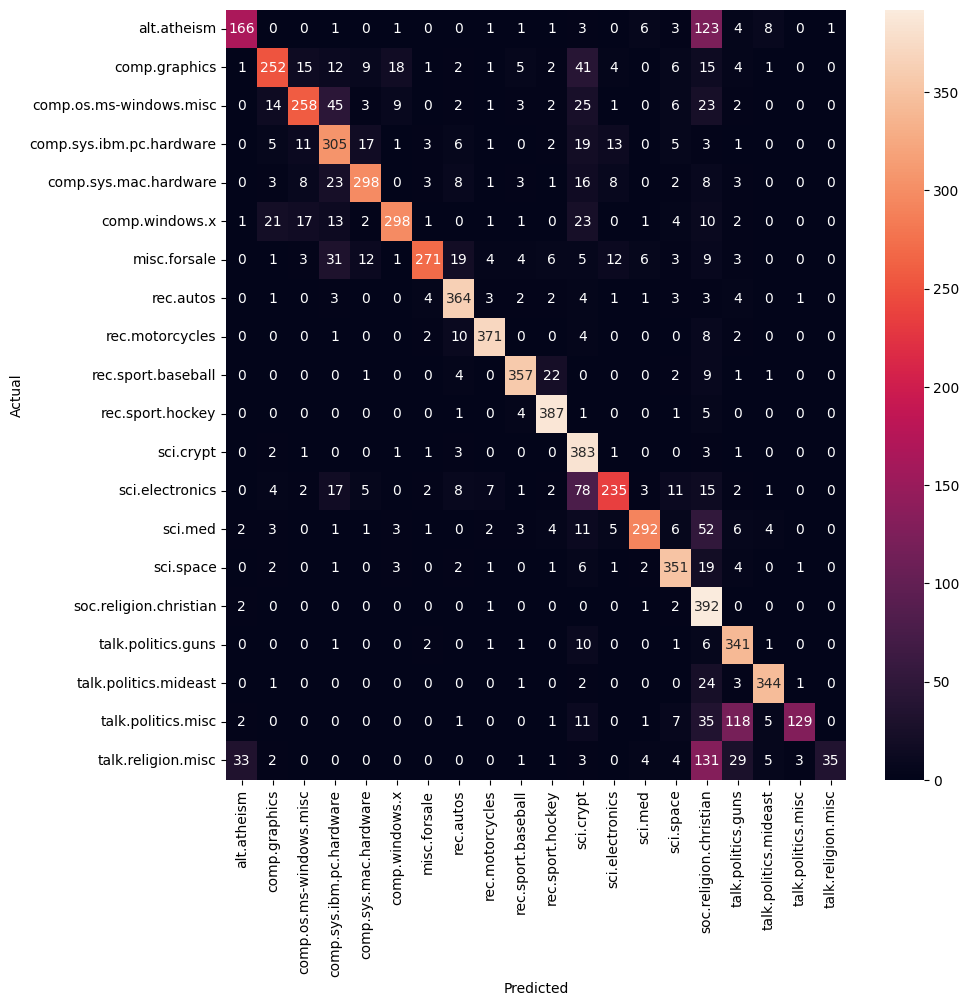

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt='d',xticklabels=twety_test.target_names,yticklabels=twety_test.target_names)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()